# Užduotys

1. Taip vadinami Hermito polinomai apibrėžiami rekursija (su išvestine): $H_0(x) = 1$, $H_{n+1}(x)=x\,H_n(x)-H'_n(x)$. 

1(a). Naudodamiesi Python'o ciklu "for", paskaičiuokite Hermito polinomus $H_1(x),\ldots,H_{6}(x)$.  

1(b). Nubrėžkite Hermito polinomų $H_2(x),\ldots,H_{5}(x)$ grafikus intervale $[-2,3]$, vienoej figūroje.

2. Nubrėžkite diferencialinių lygčių $\ y'=y^2+x^2-1\ $ bei $\ 2(y+y')=x+3\ $  krypčių laukus pasirinktose apibrėžimo srityse. Tai tos pačios diferencilinės lygtys kaip ir antros paskaitos užduotyse. 

In [2]:
from sympy import *
from IPython.display import display, Math

def hermite_polynomial_expr(n):
    if n < 0:
        raise Exception("Not defined for n < 0")
    elif n == 0:
        return 1
    else:
        x = symbols("x")
        m = n - 1
        H_m = hermite_polynomial_expr(m)
        Hp_m = diff(H_m)
        return (x * H_m - Hp_m).expand()

for i in range(0, 7):
    display(hermite_polynomial_expr(i))


1

x

x**2 - 1

x**3 - 3*x

x**4 - 6*x**2 + 3

x**5 - 10*x**3 + 15*x

x**6 - 15*x**4 + 45*x**2 - 15

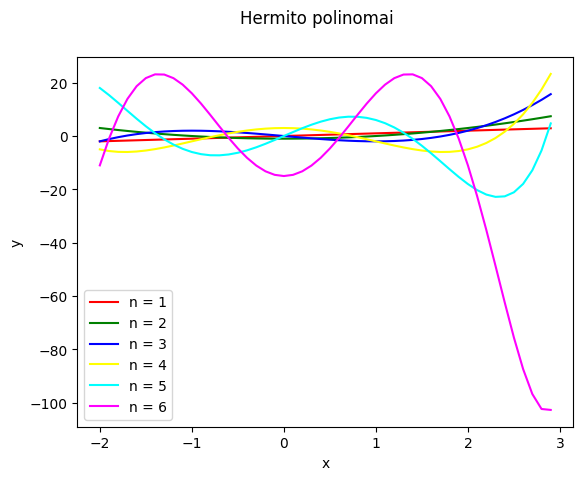

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
colors = ["red", "green", "blue", "yellow", "cyan", "magenta"]
x = symbols("x")
Xs = np.arange(-2, 3, 0.1)

fig, ax = plt.subplots()
fig.suptitle("Hermito polinomai")


for i in range(1, N + 1):
    expr = hermite_polynomial_expr(i)
    Y = []

    for t in Xs:
        val = expr.subs(x, t)
        Y.append(val)

    ax.plot(Xs, Y,color = colors[i - 1], label=f"n = {i}")
    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()


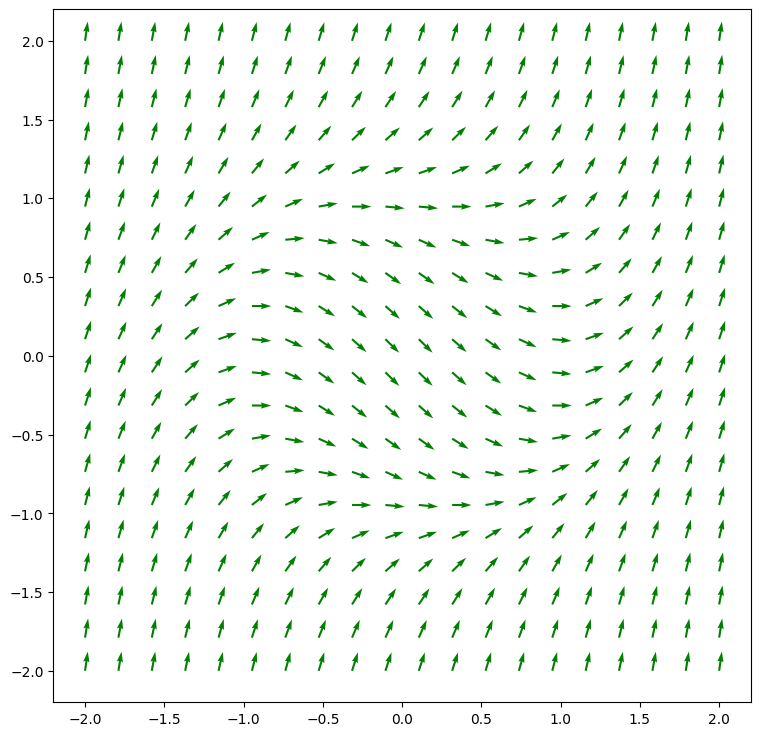

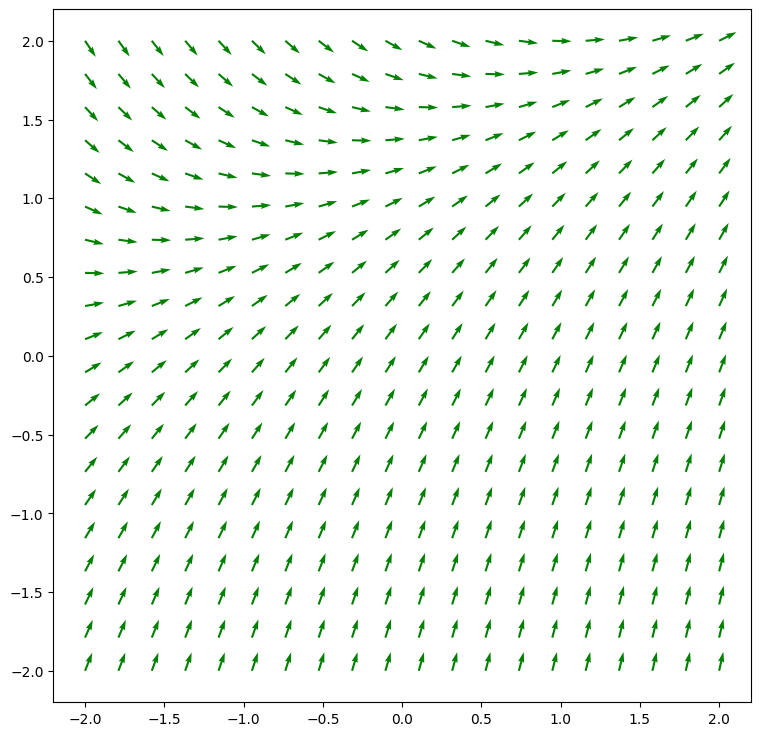

In [4]:
import matplotlib.pyplot as plt

def F(x, y):
    return y**2 + x**2 - 1

def G(x, y):
    return (x + 3) / 2 - y

size = 20

X = np.linspace(-2,2,size)
Y = np.linspace(-2,2,size)

X2, Y2 = np.meshgrid(X,Y)

FX = np.ones((size,size))
FY = F(X2, Y2)

FD = np.sqrt(FX**2 + FY**2)
GX = FX/FD
GY = FY/FD

plt.figure( figsize=(9,9) )
plt.quiver(X2,Y2,GX,GY,color="green")
plt.show()

FY = G(X2, Y2)

FD = np.sqrt(FX**2 + FY**2)
GX = FX/FD
GY = FY/FD

plt.figure( figsize=(9,9) )
plt.quiver(X2,Y2,GX,GY,color="green")
plt.show()
